<H1><div align="center" style="color:#006400" > Projet IA et Cybersécurité   </div></H1>
    <H1> <div align="center" style="color:navy" >  Système de détection d’intrusion   </div> </H1>

  <h6> <div align="right">  réalisé par: Eya Besbes </div></h6>

<h3 style="color:maroon"> 1. Ouvrir le jeu de données CICIDS2017_sample.CSV</h3>
</br>  <h4> Importation des bibliothèques </h4>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,recall_score,f1_score,precision_score,ConfusionMatrixDisplay


<h4> importation du jeu de données <h4>

In [2]:
data=pd.read_csv("/content/sample_data/CICIDS2017_sample_km.csv")
data

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,4.416666e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,7.499999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7.249999e-07,0.000000,0.000003,4.651163e-07,9.153974e-09,0.000242,0.002581,0.001010,0.000000,0.000307,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26795,4.171167e-02,0.000018,0.000010,4.643411e-05,3.083364e-06,0.024134,0.000000,0.020165,0.037594,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26796,4.180643e-02,0.000018,0.000017,4.643411e-05,6.329973e-06,0.024134,0.000000,0.020165,0.037594,0.138300,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26797,4.174313e-02,0.000014,0.000014,4.643411e-05,3.083364e-06,0.024134,0.000000,0.025207,0.042032,0.103482,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
26798,7.166666e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6


In [3]:
data.Label.value_counts()


0    18225
3     3042
6     2180
1     1966
5     1255
2       96
4       36
Name: Label, dtype: int64


<h3 style="color:maroon"> 2.Diviser les instances du jeu de données en une partie pour l’entrainement et une partie pour le test avec une proportion de 80% et 20%.</h3>

In [4]:
x=data.drop(['Label'],axis=1)
y=data['Label']
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=1)
x_train


,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
8535,1.963833e-04,0.000000,0.000003,0.000004,2.700422e-07,0.001974,0.021075,0.008248,0.000000,0.009063,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3586,5.389920e-02,0.000014,0.000000,0.000002,0.000000e+00,0.000242,0.002581,0.001010,0.000000,0.000000,...,0.000014,1.0,0.000036,0.000000,0.000036,0.000036,0.053866,0.000000,0.053866,0.053866
4755,5.075779e-01,0.000059,0.000041,0.000100,6.136214e-06,0.035898,0.000000,0.015534,0.033417,0.157450,...,0.000061,1.0,0.001164,0.001457,0.003169,0.000760,0.083281,0.000062,0.083308,0.083221
3137,2.690083e-04,0.000014,0.000003,0.000163,0.000000e+00,0.058824,0.000000,0.088539,0.097217,0.000000,...,0.000009,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
18342,1.416667e-07,0.000009,0.000000,0.000006,0.000000e+00,0.001853,0.000000,0.004320,0.003292,0.000000,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,1.766667e-06,0.000005,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
17289,2.040000e-04,0.000005,0.000007,0.000007,3.875182e-07,0.001853,0.019785,0.007743,0.000000,0.006503,...,0.000005,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5192,2.467838e-01,0.000023,0.000021,0.000034,2.714153e-06,0.016559,0.000000,0.012204,0.023275,0.090476,...,0.000023,1.0,0.000509,0.000365,0.000683,0.000335,0.083333,0.000007,0.083333,0.083333
12172,5.602166e-04,0.000000,0.000003,0.000003,1.647715e-07,0.001773,0.018925,0.007406,0.000000,0.005530,...,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
x_test

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
25086,6.749999e-07,0.000000,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25157,4.628090e-02,0.000009,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19270,1.350000e-06,0.000005,0.000007,7.131783e-06,2.380033e-07,0.001853,0.019785,0.007743,0.0,0.003994,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13935,5.250000e-07,0.000005,0.000007,3.100775e-07,1.830795e-08,0.000081,0.000860,0.000337,0.0,0.000307,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10329,1.333333e-07,0.000005,0.000000,3.100775e-07,0.000000e+00,0.000081,0.000860,0.000337,0.0,0.000000,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,6.583333e-07,0.000005,0.000007,3.100775e-07,1.830795e-08,0.000081,0.000860,0.000337,0.0,0.000307,...,0.000005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25351,4.731687e-02,0.000009,0.000003,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7073,1.333333e-07,0.000005,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24117,8.334774e-03,0.000009,0.000010,0.000000e+00,2.746192e-08,0.000000,0.000000,0.000000,0.0,0.000307,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
pd.Series(y_train).value_counts()

0    14542
3     2450
6     1761
1     1607
5      986
2       66
4       28
Name: Label, dtype: int64


<h3 style="color:maroon"> 3. Utiliser SMOTE pour équilibrer les classes non balancées avec une stratégie d’échantillonnage égale à {2:1000, 4:1000}. </h3>

In [7]:
!pip3 install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={2:1000, 4:1000})
x_train, y_train=smote.fit_resample(x_train, y_train)
print(pd.Series(y_train).value_counts())
print(pd.Series(y_test).value_counts())

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


0    14542
3     2450
6     1761
1     1607
4     1000
2     1000
5      986
Name: Label, dtype: int64
0    3683
3     592
6     419
1     359
5     269
2      30
4       8
Name: Label, dtype: int64


<h2 style="color:navy"> Partie 1 : implémentation du premier classificateur  </h2>

<h3 style="color:maroon"> 4. Décrire brièvement le fonctionnement du classificateur 1. </h3>

L’analyse discriminante linéaire (LDA ou ADL) est une technique sous contrainte (canonique) qui divise une matrice de réponse en groupes en fonction d’un facteur en trouvant la combinaison de variables qui donne la meilleure séparation possible entre les groupes. Le regroupement est effectué en maximisant la dispersion entre les groupes par rapport à la dispersion à l’intérieur des groupes. Cela vous permet de déterminer dans quelle mesure votre ensemble de variables indépendantes explique un regroupement a priori.La LDA compile des fonctions discriminantes à partir de descripteurs centrés-réduits. Les coefficients obtenus quantifient la contribution relative des variables explicatives sur la discrimination des objets. Les fonctions d’identification peuvent être générées à partir des descripteurs originaux pour classifier de nouvelles données dans des groupes pré-définis. Il existe plusieurs applications utiles de cette capacité à prédire les regroupements, comme la prédiction de l’appartenance d’une espèce de poisson à un groupe selon sa morphologie. On pourrait aussi déterminer si un nouvel article concerne un écosystème terrestre, marin ou d’eau douce selon une classification existante d’articles dans ces biomes effectuée à partir de mots clés de résumés.

<h4> Importation des bibliothèques </h4>

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import time

<h3 style="color:maroon">5. Entrainer le modèle en utilisant le premier classificateur en passant les données d’entrainement</h3>  

In [10]:
%%time
clf = LinearDiscriminantAnalysis()
start_time = time.time()
clf.fit(x_train, y_train)
end_time = time.time()
 #Calculer le temps pris par le classificateur pour s'entraîner
training_time = end_time-start_time

CPU times: user 798 ms, sys: 203 ms, total: 1 s
Wall time: 1.22 s


<h3 style="color:maroon">6. Faire la prédiction (test) en utilisant le premier classificateur en passant les données de test</h3>  

In [11]:
start_time = time.time()
y_pred = clf.predict(x_test)
end_time = time.time()

# Calculer le temps pris par le classificateur pour prédire les étiquettes
prediction_time = end_time-start_time


<h3 style="color:maroon">7. Donner le temps pris par le premier classificateur pour construire le modèle. </h3>

In [12]:
print("\ntemps pris pour l'entrainement du modele est :  ", training_time)
print("\n\ntemps pris pour prédire les classes  est : ", prediction_time)


temps pris pour l'entrainement du modele est :   1.2207691669464111


temps pris pour prédire les classes  est :  0.03592967987060547


<h3 style="color:maroon">8. Donner les statistiques données par le classificateur (acuracy, precision, recall et f1-score) et interpréter les résultats.  </h3>

In [13]:
accuracy1 = accuracy_score(y_test, y_pred)
print("\n\nAccuracy of LDA Classifier ", accuracy1)
precision1=precision_score(y_test, y_pred, average='weighted')
print("\n \nPresicion of LDA Classifier ",precision1)
recall1=recall_score(y_test, y_pred, average='weighted')
print("\n\n Recall of LDA Classifier ", recall_score(y_test, y_pred, average='weighted'))
fscore1=f1_score(y_test, y_pred, average='weighted')
print("\n\n f1 score of LDA Classifier ",fscore1)
print("\n\n f1 score for each class of LDA Classifier \n",f1_score(y_test, y_pred, average=None))



Accuracy of LDA Classifier  0.8434701492537313

 
Presicion of LDA Classifier  0.8626359551380055


 Recall of LDA Classifier  0.8434701492537313


 f1 score of LDA Classifier  0.8454748403213556


 f1 score for each class of LDA Classifier 
 [0.89969937 0.50814332 0.32167832 0.79482072 0.30769231 0.76571429
 0.8284153 ]


On peut dire que  notre modèle est performant la plupart des temps avec un score de 0.84 mais si on prend le f1-score pour chaque classe on constate qu'il a des difficultés à prédire correctement les données de la classe 2 , 4 et même aussi la classe 1. 

<h3 style="color:maroon">9. Donner la précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) et interpréter les résultats </h3>

In [14]:
print("\n\nla précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) \n\n")
print(classification_report(y_test,y_pred))




la précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) 


              precision    recall  f1-score   support

           0       0.91      0.89      0.90      3683
           1       0.61      0.43      0.51       359
           2       0.20      0.77      0.32        30
           3       0.97      0.67      0.79       592
           4       0.22      0.50      0.31         8
           5       0.62      1.00      0.77       269
           6       0.76      0.90      0.83       419

    accuracy                           0.84      5360
   macro avg       0.61      0.74      0.63      5360
weighted avg       0.86      0.84      0.85      5360



On constate que les métriques de la classe 1 sont très faibles par rapport aux autres classe

<h3 style="color:maroon">10.  Donner et interpréter les résultats de la matrice de confusion donnée par le classificateur (confusion matrix) </h3>

Text(0.5, 1.0, 'la matrice de confusion ')

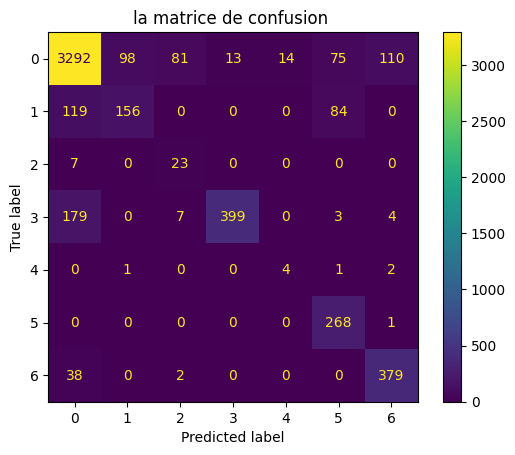

In [15]:
cm = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion

cm
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("la matrice de confusion ")

En interprétant ces résultats, nous pouvons conclure que notre modèle est assez précis pour identifier les classes : 0 ,3,5 et 6 , mais pas aussi précis pour identifier les classes 1 , 2 , 4 . 

<h2 style="color:navy"> Partie 2 : implémentation du deuxième classificateur  </h2>

<h3 style="color:maroon"> 11. Décrire brièvement le fonctionnement du classificateur 2. </h3>


Le modèle GaussianProcessClassifier (classifieur de processus gaussien) est un algorithme d'apprentissage automatique supervisé utilisé pour la classification de données. Il est basé sur les processus gaussiens, également appelés processus de régression gaussienne, qui sont des modèles probabilistes flexibles.
Il convient de noter que l'estimation des processus gaussiens peut être computationnellement intensive, en particulier pour des ensembles de données volumineux. Des approximations et des méthodes d'optimisation efficaces sont souvent utilisées pour rendre l'apprentissage et l'inférence réalisables dans des délais raisonnables.

En résumé, le modèle GaussianProcessClassifier utilise des processus gaussiens pour modéliser les relations entre les caractéristiques et les étiquettes de classe, ce qui lui permet de fournir des prédictions probabilistes pour la classification.

<h3 style="color:maroon"> 12.  Entrainer le modèle en utilisant le deuxième classificateur en passant les données d’entrainement</h3>

<h4> Importation des bibliothèques </h4>

In [16]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

In [22]:
gpc = GaussianProcessClassifier()
start_time = time.time()
gpc.fit(x_train, y_train)
end_time = time.time()
 #Calculer le temps pris par le classificateur pour s'entraîner
training_time = end_time-start_time

<h3 style="color:maroon">13.  Faire la prédiction en utilisant le deuxième classificateur en passant les données de test.   </h3>

In [25]:
start_time = time.time()
y_pred = gpc.predict(X_test)
end_time = time.time()

# Calculer le temps pris par le classificateur pour prédire les étiquettes
prediction_time = end_time-start_time


<h3 style="color:maroon"> 14.  Donner le temps pris par le deuxième classificateur pour construire le modèle. </h3>

In [26]:
print("temps pris pour l'entrainement du modele est  ", training_time)
print("\n\ntemps pris pour prédire les classes  est  ", prediction_time)

temps pris pour l'entrainement du modele est   1539.7552497386932


temps pris pour prédire les classes  est   158.01563048362732


<h3 style="color:maroon"> 15.  Donner les statistiques données par le classificateur (acuracy, precision, recall et f1-score) et interpréter les résultats.  </h3>

In [32]:
accuracy2 = accuracy_score(y_test, y_pred)
print("\n\nAccuracy of Guassian process classifier  ", accuracy2)
precision2=precision_score(y_test, y_pred, average='weighted')
print("\n \nPresicion of Guassian pôrcess classifier  ",precision2)
recall2=recall_score(y_test, y_pred, average='weighted')
print("\n\n Recall of Guassian process classifier ", recall2)
fscore2=f1_score(y_test, y_pred, average='weighted')
print("\n\n f1 score of Guassian process classifier  ",fscore2)
print("\n\n f1 score for each class of Guassian porcess classifier \n",f1_score(y_test, y_pred, average=None))



Accuracy of Guassian process classifier   0.832723470987977

 
Presicion of Guassian pôrcess classifier   0.8463844095634628


 Recall of Guassian process classifier  0.832723470987977


 f1 score of Guassian process classifier   0.8227899161328385


 f1 score for each class of Guassian porcess classifier 
 [0.89160426 0.57446809 0.43809524 0.75903614 0.875      0.65625
 0.85106383]


<h3 style="color:maroon"> 16.  Donner la précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) et interpréter les résultats. </h3>

In [33]:
print("\n\nla précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) \n\n")
print(classification_report(y_test,y_pred))



la précision détaillée pour chaque classe d’attaque (Detailed Accuracy By Class, precision, recall et f1-score) 


              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1192
           1       0.54      0.62      0.57       131
           2       1.00      0.28      0.44        82
           3       0.96      0.63      0.76       201
           4       0.90      0.85      0.88        82
           5       0.89      0.52      0.66        81
           6       0.87      0.83      0.85       144

    accuracy                           0.83      1913
   macro avg       0.86      0.67      0.72      1913
weighted avg       0.85      0.83      0.82      1913



<h3 style="color:maroon"> 17.  Donner et interpréter les résultats de la matrice de confusion donnée par le classificateur (confusion matrix) </h3>

Text(0.5, 1.0, 'la matrice de confusion ')

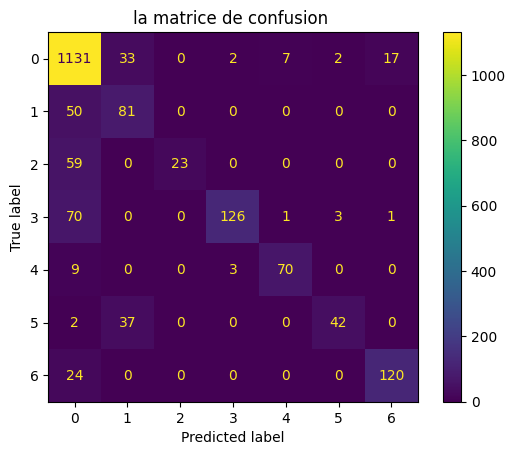

In [34]:
cm1 = confusion_matrix(y_test, y_pred)

# Affichage de la matrice de confusion

cm1
disp = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()
plt.title("la matrice de confusion ")

En interprétant ces résultats, nous pouvons conclure que notre modèle est précis lors de l'identification des classes : 0 ,2,3,4,5 et 6  , mais pas aussi précis pour identifier la classe 1. 

<h2 style="color:navy"> Partie 3 : comparaison des résultats  </h2>

<h3 style="color:maroon"> 18.  Comparer les résultats trouvés par les deux classificateurs sous forme d’un tableau? Que peut-on conclure. </h3>

In [35]:
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-score']
clf1_metrics =[accuracy1,precision1,recall1,fscore1]
clf2_metrics =[accuracy2,precision2,recall2,fscore2]
# Affichage des résultats sous forme de tableau
print('\n{:<10s}{:<10s}{:<10s}{:<10s}{:<10s}'.format('*******   ', *metrics_names),'\n')
print('{:<10s}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format('Classifier1 ', *clf1_metrics),'\n')
print('{:<10s}{:<10.3f}{:<10.3f}{:<10.3f}{:<10.3f}'.format('classifier2 ', *clf2_metrics),'\n')


*******   Accuracy  Precision Recall    F1-score   

Classifier1 0.843     0.863     0.843     0.845      

classifier2 0.833     0.846     0.833     0.823      



In [36]:

df = pd.DataFrame({'Classifier': ['LinearDiscriminantAnalysis', 'Guassian process Classifier'],
        'Accuracy': [accuracy1, accuracy2],
        'Precision': [precision1, precision2],
        'Recall': [recall1, recall2],
        'F1-score': [fscore1, fscore2]})


df

,Classifier,Accuracy,Precision,Recall,F1-score
0,LinearDiscriminantAnalysis,0.843470,0.862636,0.843470,0.845475
1,Guassian process Classifier,0.832723,0.846384,0.832723,0.822790


</br>

En comparant les résultats des deux classificateurs, nous pouvons conclure que :

* Le classifier 1 donne de meilleurs résultats que le classifier1 pour toutes les métriques (accuracy, precision, recall et f1-score). 
</br>

* Le classifier 1 a une précision plus élevée que le classifier1, ce qui signifie qu'il a une plus grande capacité à identifier correctement les exemples positifs.
</br>
* Le classifier 1 a également un rappel plus élevé que le classifier1, ce qui signifie qu'il a une plus grande capacité à identifier tous les exemples positifs.
</br>
* Enfin, le f1-score est également plus élevé pour le classifier1, ce qui indique une meilleure performance globale pour la classification des classes. 
</br>
* Le temps d'execution du premier classifieur est tres petit par rapport au deuxième classifieur ce qui signifie que le premier classifieur est beaucoup plus rapide que le deuxième classifieur.
 </br>

Ces résultats suggèrent que le classificateur Linear Discriminant Analysis est  meilleur que le classifieur Gaussian Process Classifier pour un Système de détection d'intrusion étudiée